In [40]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline


In [37]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10, 9))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")


In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

X = train.iloc[:, 1:]
y = train['label']
lable = sorted(y.unique())

In [5]:
lable

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

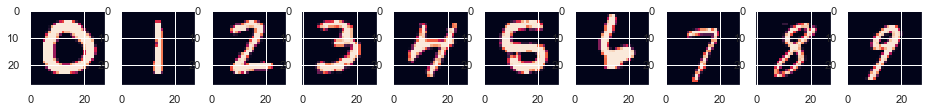

In [8]:
plt.figure(figsize=(16,16))
for i in lable:
    plt.subplot(1, 10, i+1)
    # 换一种展示方式 784=28*28
    # 仅选取对应数字的第一条数据[1:2](左闭右开)
    img = np.array(X[y==i][1:2]).reshape(28, 28)
    plt.imshow(img)

In [17]:
m = y.unique().shape[0]
n = X.shape[1]

mu = np.zeros((m,n))
si = np.zeros((m,n))
for i in lable:
    mu[i] = X[y==i].mean()
    si[i] = X[y==i].std()

In [20]:
mu

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

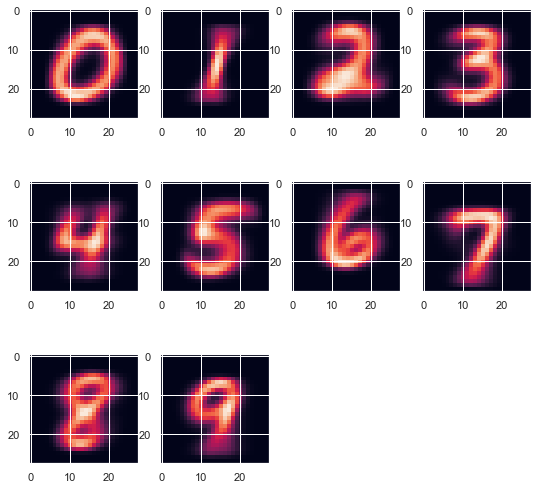

In [23]:
plt.figure(figsize=(9,9))
for i in lable:
    plt.subplot(3,4, i+1)
    img = np.array( mu[i] ).reshape(28,28)
    plt.imshow(img)

Sum Axis-1 as Classification accuracy: 0.5652380952380952


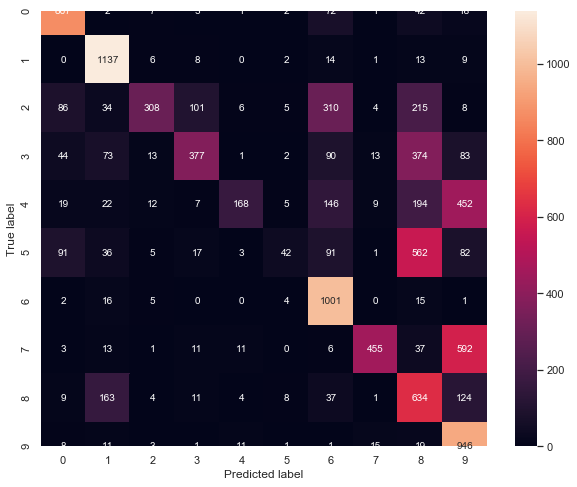

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
draw_confusionmatrix(y_test,yhat)

In [41]:
nb = MultinomialNB()

nb.fit(X, y)

y_pred = nb.predict(X_test)